#**Exponential smoothing**



##  install these libraries using pip:



In [1]:
!pip install pandas matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


## Loading dataset

In [3]:
data = pd.read_csv('/content/airline-passengers.csv', parse_dates=['Month'], index_col='Month')
print(data.head())


            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


## Visualizing the data
### Before we apply simple exponential smoothing to the data, let’s visualize it to get a better understanding of its properties. We can use the plot function of pandas to create a line plot of the data:




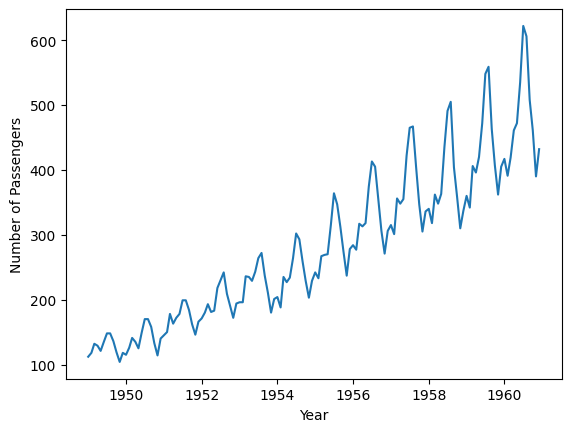

In [4]:
plt.plot(data)
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()


We can see that the number of passengers appears to be increasing over time, with some seasonality as well.



#**Single Exponential smoothing**
### Now that we’ve loaded and visualized the data, we can perform simple exponential smoothing using the SimpleExpSmoothing function from the statsmodels library.

### Then, we’ll create an instance of the SimpleExpSmoothing class, passing in the data as an argument, and then fit the model to the data using the fit method, This will calculate the smoothing parameters and fit the model to the data.




In [5]:
from statsmodels.tsa.api import SimpleExpSmoothing
model = SimpleExpSmoothing(data)
model_single_fit = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


## Making predictions
### Finally, we can use the forecast method of the model to make predictions for future values of the time series, where the argument represents the number of periods to forecast. This will produce a forecast for the next six months:




In [6]:
forecast_single = model_single_fit.forecast(6)
print(forecast_single)


1961-01-01    431.791781
1961-02-01    431.791781
1961-03-01    431.791781
1961-04-01    431.791781
1961-05-01    431.791781
1961-06-01    431.791781
Freq: MS, dtype: float64


## Visualize Single Exponential Smoothing
### Let’s set the forecast to 40, and check the trend for next 40 months.




In [7]:
forecast_single = model_single_fit.forecast(40)


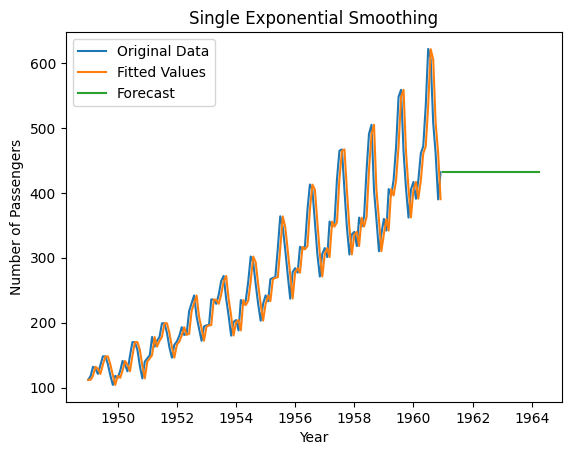

In [8]:
plt.plot(data, label='Original Data')
plt.plot(model_single_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_single, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Single Exponential Smoothing')
plt.legend()
plt.show()


#**Double Exponential Smoothing**

### Double exponential smoothing, also known as Holt’s method, extends single exponential smoothing to capture trends in the data. It involves forecasting both the level and trend components of the time series.

### Now, let’s write the code to perform double exponential smoothing (Holt’s method) using the Holt function from the statsmodels library:


*   Create an instance of Holt class

*   Fit the model to the data



In [9]:
from statsmodels.tsa.api import Holt

model_double = Holt(data)
model_double_fit = model_double.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


## Making predictions



In [10]:
forecast_double = model_double_fit.forecast(6)
print(forecast_double)


1961-01-01    436.196220
1961-02-01    440.578651
1961-03-01    444.961083
1961-04-01    449.343515
1961-05-01    453.725946
1961-06-01    458.108378
Freq: MS, dtype: float64


## Visualize Double Exponential Smoothing
### Let’s set the forecast to 40, and check the trend for next 40 months, same as earlier.




In [11]:
forecast_double = model_double_fit.forecast(40)


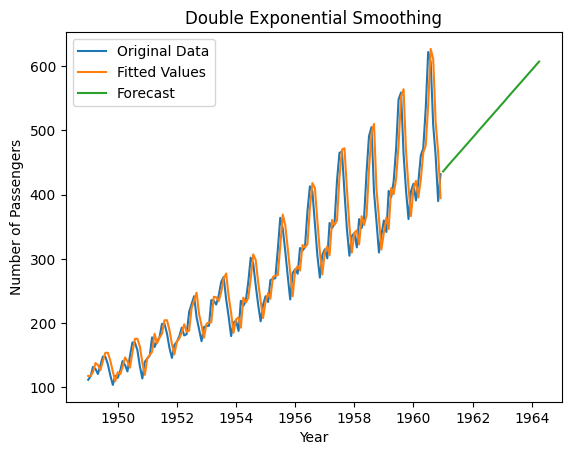

In [12]:
plt.plot(data, label='Original Data')
plt.plot(model_double_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_double, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Double Exponential Smoothing')
plt.legend()
plt.show()


#**Holt-Winter’s Seasonal Smoothing**

### Holt-Winter’s Seasonal Smoothing, extends double exponential smoothing to capture seasonality in the data. It involves forecasting the level, trend, and seasonality components of the time series.

### Now, let’s write the code to perform triple exponential smoothing (Holt-Winters method) using the ExponentialSmoothing function from the statsmodels library:





In [13]:
from statsmodels.tsa.api import ExponentialSmoothing

# Create an instance of ExponentialSmoothing class
model_triple = ExponentialSmoothing(
    data, seasonal_periods=12, trend='add', seasonal='add')

# Fit the model to the data
model_triple_fit = model_triple.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


## Making predictions



In [14]:
forecast_triple = model_triple_fit.forecast(6)
print(forecast_triple)


1961-01-01    451.577073
1961-02-01    427.257748
1961-03-01    464.699360
1961-04-01    500.103185
1961-05-01    508.660794
1961-06-01    567.713873
Freq: MS, dtype: float64


## Visualize Triple Exponential Smoothing
### Let’s set the forecast to 40, and check the trend for next 40 months, same as earlier.




In [15]:
forecast_triple = model_triple_fit.forecast(40)


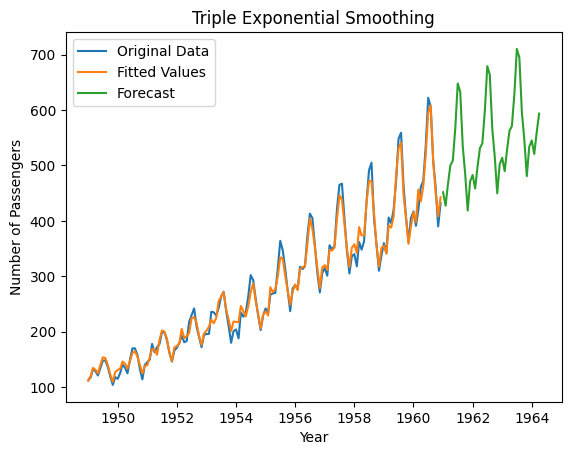

In [16]:
plt.plot(data, label='Original Data')
plt.plot(model_triple_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_triple, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Triple Exponential Smoothing')
plt.legend()
plt.show()


##**Well done :)**